In [1]:
import pandas as pd


In [2]:
content=pd.read_csv(r"D:\accenture\Content.csv")

In [3]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [4]:
content.drop(['Category'],axis=1,inplace=True)

In [5]:
content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
URL           199
dtype: int64

In [6]:
content.dropna(inplace=True)

In [7]:
content.isnull().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
URL           0
dtype: int64

In [8]:
content.dtypes

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
URL           object
dtype: object

In [9]:
reaction=pd.read_csv(r"Reactions.csv")

In [10]:
reaction.dropna(inplace=True)

In [11]:
reaction

,Unnamed: 0,Content ID,User ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
...,...,...,...,...,...
25547,25547,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [12]:
reaction_type=pd.read_csv(r"D:\accenture\ReactionTypes.csv")

In [13]:

reaction_type.dtypes

s_no          int64
Type         object
Sentiment    object
Score         int64
dtype: object

In [14]:
reaction_type.drop(['s_no'],axis=1,inplace=True)

In [15]:
cleaned_data=content[['Content ID','User ID','URL']].merge(reaction[["Content ID",'Type','Datetime']]
                                                                  ,on='Content ID',how='left')

In [16]:
cleaned_data

,Content ID,User ID,URL,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,https://socialbuzz.cdn.com/content/storage/975...,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,https://socialbuzz.cdn.com/content/storage/975...,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,https://socialbuzz.cdn.com/content/storage/975...,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,https://socialbuzz.cdn.com/content/storage/975...,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,https://socialbuzz.cdn.com/content/storage/975...,interested,2020-08-23 12:25:58
...,...,...,...,...,...
18408,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,https://socialbuzz.cdn.com/content/storage/75d...,worried,2020-10-31 04:50:14
18409,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,https://socialbuzz.cdn.com/content/storage/75d...,dislike,2020-06-27 09:46:48
18410,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,https://socialbuzz.cdn.com/content/storage/75d...,intrigued,2021-02-16 17:17:02
18411,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,https://socialbuzz.cdn.com/content/storage/75d...,worried,2020-11-04 20:08:31


In [17]:
cleaned_data['Content ID'].unique()

array(['97522e57-d9ab-4bd6-97bf-c24d952602d2',
       '9f737e0a-3cdd-4d29-9d24-753f4e3be810',
       '230c4e4d-70c3-461d-b42c-ec09396efb3f',
       '356fff80-da4d-4785-9f43-bc1261031dc6',
       '01ab84dd-6364-4236-abbb-3f237db77180',
       '3f8590c7-6ab2-4973-805a-90cdec355f05',
       'e5490118-90d5-4572-ab1c-1fbc87b8d9ca',
       '0bedca96-fb76-4287-a83c-17330ed39cce',
       'b18cb63f-4c8e-44ee-a47f-541e95191d11',
       '46fb701d-6c26-458e-ada3-2ebe5dbba01f',
       '0be59876-d70c-486c-8e0b-a06bef7a2cd6',
       '81abd65a-3b76-4574-a0a7-db6bf7184ae2',
       'e6ee2244-9382-49a9-8cbf-fa54aaaa2392',
       'f332d362-dc48-46c2-a64b-641157c0987e',
       'a2e93b29-9259-4092-a4d7-62d5e823bb74',
       '9b3a6d30-48e8-476c-82be-9031524bd04d',
       '850fe90d-47d6-4eb7-b9c8-810afcb99ce9',
       'f98dde71-ce1d-4f6c-bb05-ae05779d2207',
       '388bd9db-9d10-4f47-87c4-6db46e83bc95',
       '78d0075f-895c-4a15-a35c-a921e2bb2cea',
       'bda0b065-7f8b-4d52-b7e9-fcc375cdab08',
       '809b4

In [18]:
cleaned_data=cleaned_data[['Content ID','User ID','URL','Type','Datetime']].merge(reaction_type[['Type','Sentiment','Score']]
                                                                  ,on='Type',how='left')

In [19]:
cleaned_data

,Content ID,User ID,URL,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,https://socialbuzz.cdn.com/content/storage/975...,disgust,2020-11-07 09:43:50,negative,0.0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,https://socialbuzz.cdn.com/content/storage/975...,dislike,2021-06-17 12:22:51,negative,10.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,https://socialbuzz.cdn.com/content/storage/975...,scared,2021-04-18 05:13:58,negative,15.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,https://socialbuzz.cdn.com/content/storage/975...,disgust,2021-01-06 19:13:01,negative,0.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,https://socialbuzz.cdn.com/content/storage/975...,interested,2020-08-23 12:25:58,positive,30.0
...,...,...,...,...,...,...,...
18408,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,https://socialbuzz.cdn.com/content/storage/75d...,worried,2020-10-31 04:50:14,negative,12.0
18409,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,https://socialbuzz.cdn.com/content/storage/75d...,dislike,2020-06-27 09:46:48,negative,10.0
18410,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,https://socialbuzz.cdn.com/content/storage/75d...,intrigued,2021-02-16 17:17:02,positive,45.0
18411,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,https://socialbuzz.cdn.com/content/storage/75d...,worried,2020-11-04 20:08:31,negative,12.0


In [20]:
cleaned_data.to_csv("cleaned_data.csv",index =False)

In [21]:
cleaned_data.sort_values(by=['Score'],inplace=True)

In [22]:
cleaned_data.dropna(inplace=True)


In [23]:
print("Top 5 data are :")
cleaned_data.tail()

Top 5 data are :


,Content ID,User ID,URL,Type,Datetime,Sentiment,Score
3446,d0e55134-c60e-4a05-999c-d7697b4901f0,cf34e8ee-f508-47bc-baa1-bcc576e1084d,https://socialbuzz.cdn.com/content/storage/d0e...,super love,2020-10-21 16:44:25,positive,75.0
7010,bc1f22da-d7b2-49d8-a6f1-1132776b4b18,20d507a0-fdba-4c04-a30c-bd18273accdc,https://socialbuzz.cdn.com/content/storage/bc1...,super love,2020-07-12 18:10:03,positive,75.0
14184,4bfc9824-aaeb-4695-8195-945686795b30,d71363d5-6468-44b0-b641-94c4776bce98,https://socialbuzz.cdn.com/content/storage/4bf...,super love,2021-04-16 07:33:52,positive,75.0
16819,42a0f482-d3a8-4216-ba0b-1459abf854a6,c880dbc5-8997-4f38-9055-c254b9133175,https://socialbuzz.cdn.com/content/storage/42a...,super love,2021-04-29 10:39:46,positive,75.0
8622,f5068d8a-d4ba-49ee-8f30-716c1ec57e04,78703a69-8edc-458f-b0fc-85d96501dcdc,https://socialbuzz.cdn.com/content/storage/f50...,super love,2021-04-18 04:05:27,positive,75.0


In [25]:
import matplotlib.pyplot as plt

In [53]:
cleaned_data['Type'].unique()
data=[ 'like', 'heart', 'love',
        'cherish', 'adore', 'super love']
score=[ 20,  45., 50, 65., 70, 75.]

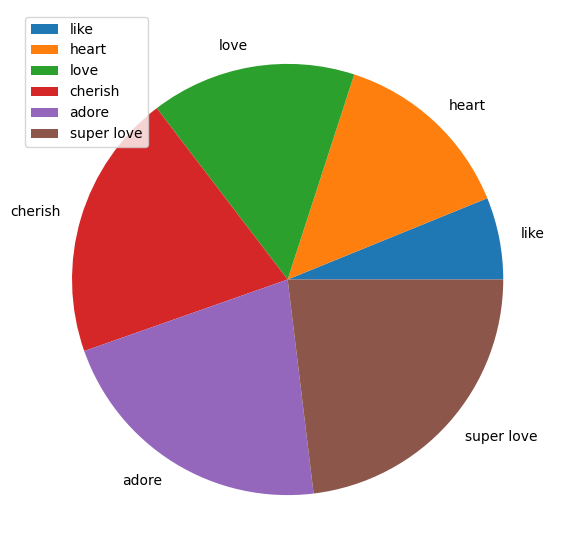

In [55]:
fig = plt.figure(figsize =(10, 7))
plt.pie(score,labels=data)
plt.legend()
plt.show()
 

In [60]:
fig=plt.figure(figsize=(10,7))
plt.bar(score,labels=data)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1000x700 with 0 Axes>